# A single neuron
This demo shows you how to construct and manipulate a single leaky integrate-and-fire (LIF) neuron. The LIF neuron is a simple, standard neuron model, and here it resides inside a neural ‘population’, even though there is only one neuron.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo

## Step 1: Create the Neuron

In [14]:
from nengo.dists import Uniform

neuron_type = nengo.neurons.LIF(spiking_threshold=5)

model = nengo.Network(label='A Single Neuron')
with model:
    neuron = nengo.Ensemble(
        1,
        dimensions=1,  # Represent a scalar
        intercepts=Uniform(-.5, -.5),  # Set intercept to 0.5
        max_rates=Uniform(100, 100),  # Set the maximum firing rate of the neuron to 100hz
        encoders=[[1]],  # Sets the neurons firing rate to increase for positive input
        neuron_type=neuron_type)

## Step 2: Provide Input to the Model
Create an input node generating a cosine wave.

In [27]:
with model:
    cos = nengo.Node(lambda t: 5*t)

## Step 3: Connect the Network Elements

In [28]:
with model:
    # Connect the input signal to the neuron
    nengo.Connection(cos, neuron)

## Step 4: Add Probes
Anything that is probed will collect the data it produces over time, allowing us to analyze and visualize it later.

In [29]:
with model:
    cos_probe = nengo.Probe(cos)  # The original input
    spikes = nengo.Probe(neuron.neurons)  # The raw spikes from the neuron
    voltage = nengo.Probe(neuron.neurons,'voltage')  # Subthreshold soma voltage of the neuron
    filtered = nengo.Probe(neuron, synapse=0.01)  # Spikes filtered by a 10ms post-synaptic filter

## Step 5: Run the Model

In [30]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

## Step 6: Plot the Results

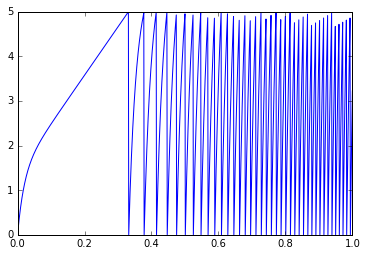

In [31]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[voltage])

The top graph shows that the input signal in green and the filtered output spikes from the single neuron population in blue. The spikes (that are filtered) from the neuron are shown in the bottom graph on the left. On the right is the subthreshold voltages for the neuron.